In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [ ]:
#load dataset
df = pd.read_csv('heart_attack_predictions.csv')

In [ ]:
df.head()

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882857,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died


In [ ]:
#Summary of numeric columns
df.describe()

,Age,Cholesterol_Level,Blood_Pressure,Alcohol_Consumption,Stress_Levels,Max_Heart_Rate_Achieved,HDL_Cholesterol,LDL_Cholesterol,Triglycerides,Air_Pollution_Exposure
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,53.166738,224.559617,129.895133,5.060489,5.467001,129.548793,60.276083,124.957319,275.616009,55.089205
std,20.711944,43.512202,28.785850,2.908743,2.573239,40.488591,23.215529,43.182720,131.201681,25.789444
min,18.000000,150.025297,80.003323,0.001163,1.001188,60.000000,20.000154,50.025371,50.003334,10.001927
25%,35.000000,186.545719,105.185723,2.541921,3.256555,94.000000,40.098066,87.468790,160.462615,33.336387
50%,53.000000,224.578284,130.226184,5.135886,5.401697,130.000000,60.430650,124.710090,276.531913,54.881880
75%,71.000000,262.141887,154.244395,7.529262,7.663998,165.000000,80.615328,161.700641,390.765598,77.566957
max,89.000000,299.956543,179.998373,9.999000,9.997577,199.000000,99.989524,199.986857,499.961440,99.977146


In [ ]:
# Summary of categorical variables
print(df.describe(include='object'))

           Country  Gender Smoking_History Physical_Activity Obesity Diabetes  \
count         6999    6999            6999              6999    6999     6999   
unique          25       2               3                 3       2        2   
top     Bangladesh  Female          Former         Sedentary      No      Yes   
freq           319    3519            2384              2427    3502     3541   

       Family_History Dietary_Habits Heart_Attack_History Chest_Pain  \
count            6999           6999                 6999       6999   
unique              2              3                    2          2   
top                No        Healthy                  Yes        Yes   
freq             3531           2360                 3508       3516   

       Exercise_Induced_Angina Resting_ECG        Thalassemia  \
count                     6999        6999               6999   
unique                       2           2                  3   
top                         No      No

In [ ]:
print(df.isnull().sum())

Country                       0
Age                           0
Gender                        0
Cholesterol_Level             0
Blood_Pressure                0
Smoking_History               0
Alcohol_Consumption           0
Physical_Activity             0
Obesity                       0
Diabetes                      0
Family_History                0
Stress_Levels                 0
Dietary_Habits                0
Heart_Attack_History          0
Chest_Pain                    0
Exercise_Induced_Angina       0
Resting_ECG                   0
Max_Heart_Rate_Achieved       0
Thalassemia                   0
HDL_Cholesterol               0
LDL_Cholesterol               0
Triglycerides                 0
Heart_Disease_Risk            0
Medication_Adherence          0
Urbanization_Level            0
Air_Pollution_Exposure        0
Access_To_Healthcare          0
Education_Level            1750
Income_Level                  0
Heart_Attack_Outcome          0
dtype: int64


In [ ]:
# filling Education_Level with most frequent category
df['Education_Level'] = df['Education_Level'].fillna(df['Education_Level'].mode()[0])


***`Data`*** Visualization

1. Age Distribution by Outcome



<ipython-input-9-bf0ece88324b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Attack_Outcome', y='Age', data=df, palette='flare')


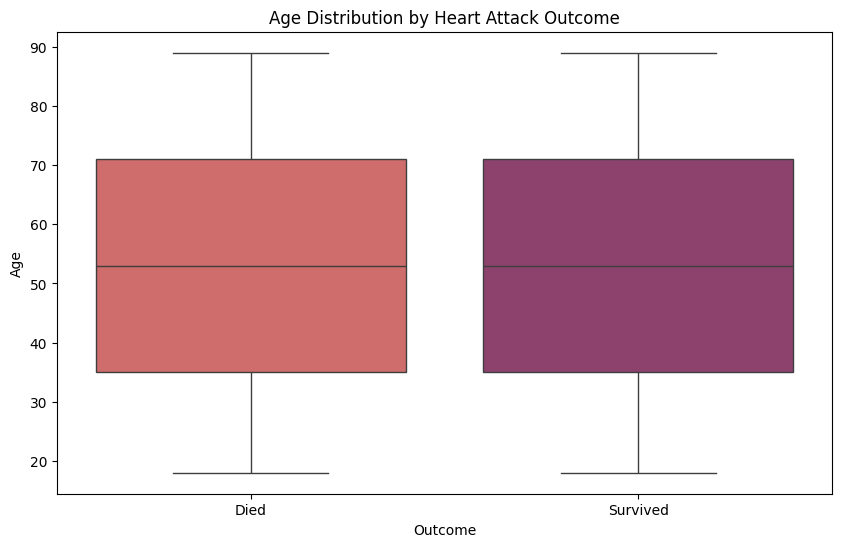

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart_Attack_Outcome', y='Age', data=df, palette='flare')
plt.title('Age Distribution by Heart Attack Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

> Visualizes the spread and central tendency of cholesterol and blood pressure levels in the population.

2. Cholesterol Level vs. Blood Pressure

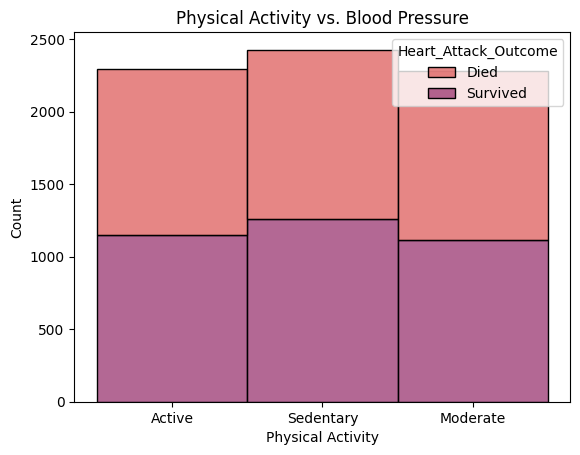

In [ ]:
sns.histplot(data=df, x="Physical_Activity", hue="Heart_Attack_Outcome", multiple="stack", palette='flare')
plt.title('Physical Activity vs. Blood Pressure')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()

> Shows how smoking and alcohol habits relate to cholesterol and blood pressure.

3. Country Distribution of Outcomes (Top 15)

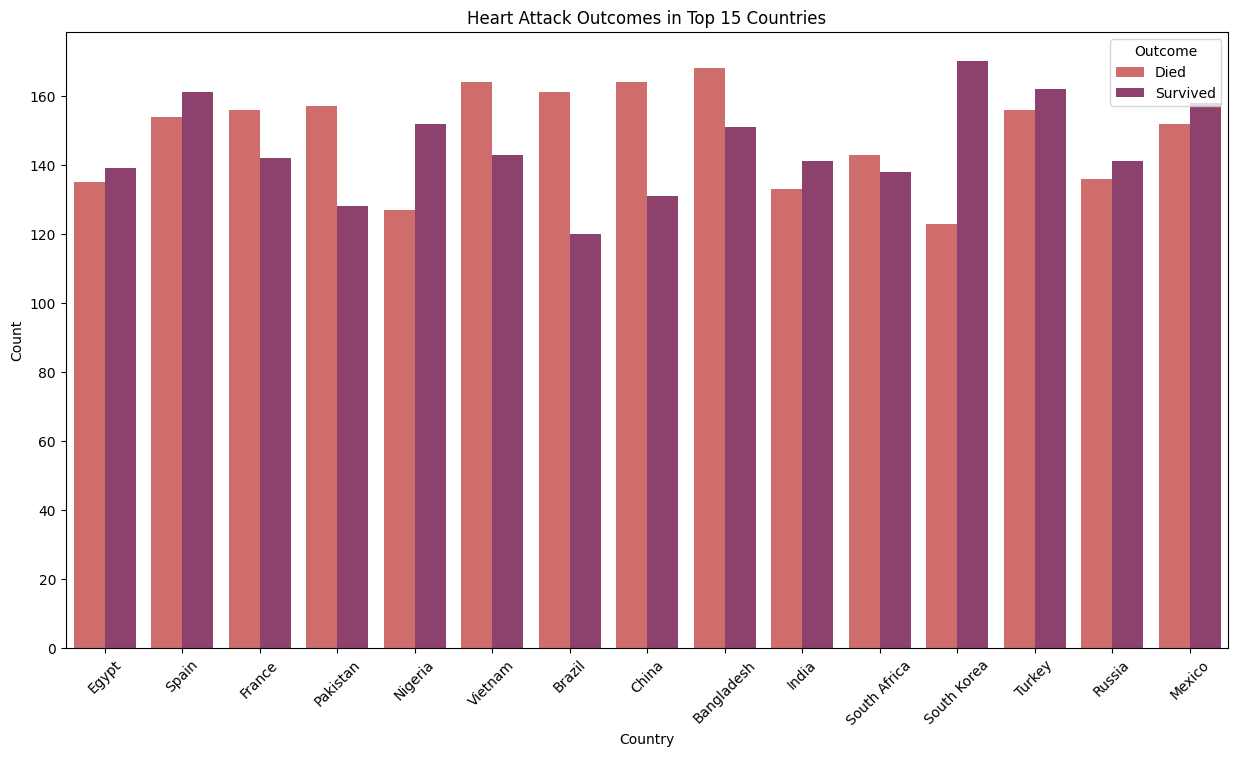

In [ ]:
# Get top 15 countries by count
top_countries = df['Country'].value_counts().nlargest(15).index

plt.figure(figsize=(15, 8))
sns.countplot(x='Country', hue='Heart_Attack_Outcome',
              data=df[df['Country'].isin(top_countries)], palette='flare')
plt.title('Heart Attack Outcomes in Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.show()

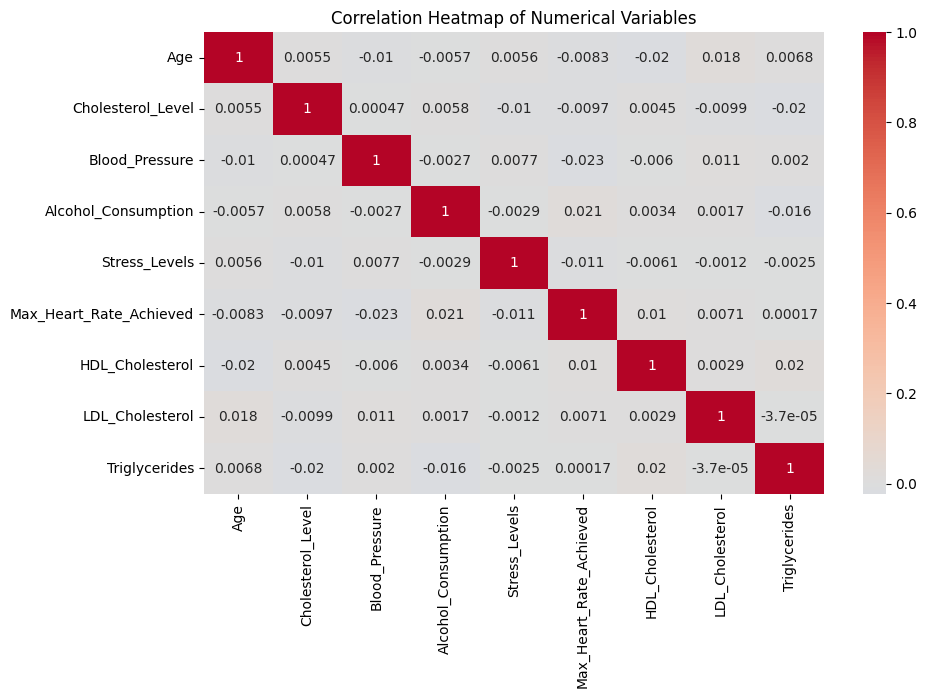

In [ ]:
# Select numerical columns for correlation
numerical_cols = ['Age', 'Cholesterol_Level', 'Blood_Pressure', 'Alcohol_Consumption',
                 'Stress_Levels', 'Max_Heart_Rate_Achieved', 'HDL_Cholesterol',
                 'LDL_Cholesterol', 'Triglycerides']

plt.figure(figsize=(10, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Compares health outcomes (e.g., heart attack survival) across different countries.

In [ ]:
# Drop non-numeric columns (if any) before PCA
df_numeric = df.select_dtypes(include=['number'])

# Handle missing values by filling with the mean
df_numeric = df_numeric.fillna(df_numeric.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


NameError: name 'df' is not defined

In [ ]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data
pca_data = pca.transform(scaled_data)

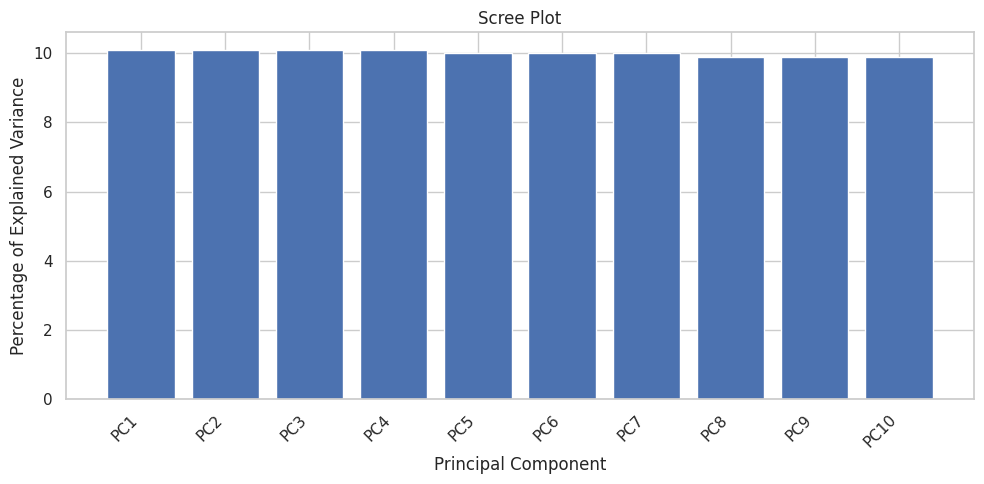

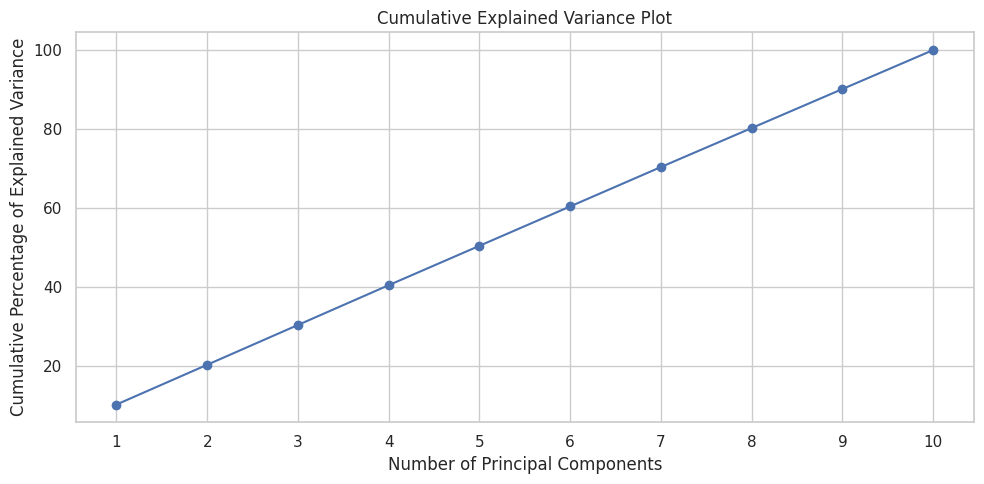

DataFrame with Principal Components:
        PC1       PC2       PC3  ...       PC8       PC9      PC10
0 -0.419520  0.148174 -1.536507  ... -2.296208 -0.378234 -0.729988
1 -0.098797 -1.252118 -0.641109  ... -0.525196 -0.833937 -0.094256
2  1.676228  0.032459  0.567579  ...  1.149461 -0.247709 -0.734801
3 -0.307458 -0.857166  1.661309  ...  0.581128  0.483710 -0.431163
4  0.236682  0.259421 -1.006506  ...  0.674269  0.616555  1.446256

[5 rows x 10 columns]


In [ ]:
# Explained variance ratio
per_var = pca.explained_variance_ratio_ * 100
per_var = [round(x, 1) for x in per_var]

# Create labels for the scree plot
labels = [f'PC{x}' for x in range(1, len(per_var) + 1)]

# Scree plot
plt.figure(figsize=(10, 5))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cumulative explained variance plot
cumulative_variance = [sum(per_var[:i + 1]) for i in range(len(per_var))]
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.ylabel('Cumulative Percentage of Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Plot')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# DataFrame with the principal components
pca_data = pca.transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=labels)

print("DataFrame with Principal Components:")
print(pca_df.head())


The scree plot and cumulative variance plot to determine the optimal number of principal components to retain after performing PCA.

Scree Plot: The scree plot shows the variance explained by each principal component. The "elbow" in the scree plot can help you decide the number of components to keep.

Cumulative Variance Plot: This shows the cumulative variance explained as you add more components. This allows you to see how many components you need to explain a large amount of the variance in your data.

In [ ]:
X = df_encoded.drop(
    [
        col for col in df_encoded.columns
        if 'Heart_Attack_Outcome' in col or 'Obesity' in col or 'Diabetes' in col
    ],
    axis=1,
    errors='ignore'
)
y_heart = df_encoded[[col for col in df_encoded.columns if 'Heart_Attack_Outcome' in col][0]] if any('Heart_Attack_Outcome' in col for col in df_encoded.columns) else None
y_obesity = df_encoded[[col for col in df_encoded.columns if 'Obesity' in col][0]] if any('Obesity' in col for col in df_encoded.columns) else None
y_diabetes = df_encoded[[col for col in df_encoded.columns if 'Diabetes' in col][0]] if any('Diabetes' in col for col in df_encoded.columns) else None

# Check if target variables exist before proceeding
if y_heart is None or y_obesity is None or y_diabetes is None:
    print("One or more target variables (Heart_Attack_Outcome, Obesity, Diabetes) not found in the dataset.")
    exit()

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_heart_train, y_heart_test = train_test_split(X, y_heart, test_size=0.3, random_state=42)
X_train, X_test, y_obesity_train, y_obesity_test = train_test_split(X, y_obesity, test_size=0.3, random_state=42)
X_train, X_test, y_diabetes_train, y_diabetes_test = train_test_split(X, y_diabetes, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[ 0.50707318,  0.61336446, -0.38416029, ..., -0.70673513,
         1.41444834, -0.70779157],
       [-1.56562636, -0.20336432, -0.46081472, ...,  1.41495725,
         1.41444834, -0.70779157],
       [ 1.42291716, -0.67565449,  0.07724072, ..., -0.70673513,
        -0.70698941, -0.70779157],
       ...,
       [ 0.79628707, -0.7194329 ,  1.45694036, ..., -0.70673513,
         1.41444834, -0.70779157],
       [-0.74618701, -0.4902701 ,  0.40554343, ...,  1.41495725,
        -0.70698941,  1.41284532],
       [-1.56562636,  1.3166535 , -0.72295774, ..., -0.70673513,
        -0.70698941,  1.41284532]])

# Model Implementation And Evaluation

Model Evaluation for Heart Attack Outcome:

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    RocCurveDisplay
)

In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_heart_train)
y_heart_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))


Logistic Regression Accuracy: 0.5045042460408538
              precision    recall  f1-score   support

       False       0.50      0.56      0.53     17295
        True       0.51      0.45      0.48     17561

    accuracy                           0.50     34856
   macro avg       0.51      0.50      0.50     34856
weighted avg       0.51      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_heart_test, y_heart_pred)
rmse = np.sqrt(mean_squared_error(y_heart_test, y_heart_pred))
f1 = f1_score(y_heart_test, y_heart_pred)
precision = precision_score(y_heart_test, y_heart_pred)
recall = recall_score(y_heart_test, y_heart_pred)
auroc = roc_auc_score(y_heart_test, logistic_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.4954957539591462
Root Mean Squared Error (RMSE): 0.7039145928016738
F1 Score: 0.47560346136329135
Precision: 0.5094315077403408
Recall: 0.4459882694607369
Area Under ROC Curve (AUROC): 0.5080173830618483


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_heart_test, y_heart_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[9753 7542]
 [9729 7832]]


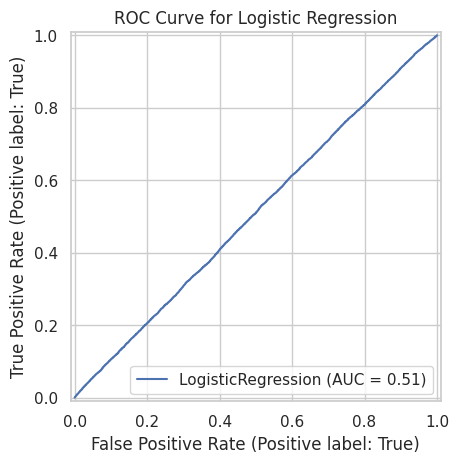

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test, y_heart_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [ ]:
# 2. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_heart_train)
y_heart_pred = knn_model.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))

k-NN Accuracy: 0.5008319944916226
              precision    recall  f1-score   support

       False       0.50      0.50      0.50     17295
        True       0.50      0.50      0.50     17561

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_heart_test, y_heart_pred)
rmse = np.sqrt(mean_squared_error(y_heart_test, y_heart_pred))
f1 = f1_score(y_heart_test, y_heart_pred)
precision = precision_score(y_heart_test, y_heart_pred)
recall = recall_score(y_heart_test, y_heart_pred)
auroc = roc_auc_score(y_heart_test, knn_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)


Mean Absolute Error (MAE): 0.4991680055083773
Root Mean Squared Error (RMSE): 0.7065182273008795
F1 Score: 0.5023311690169046
Precision: 0.5046551724137931
Recall: 0.5000284721826775
Area Under ROC Curve (AUROC): 0.5026093557764922


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_heart_test, y_heart_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8676 8619]
 [8780 8781]]


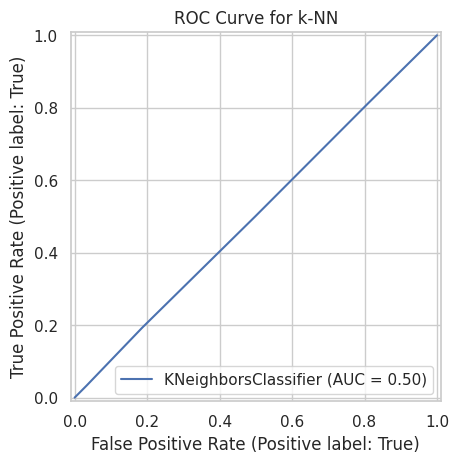

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(knn_model, X_test, y_heart_test)
plt.title('ROC Curve for k-NN')
plt.show()

In [ ]:
# 3. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_heart_train)
y_heart_pred = naive_bayes_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))


Naive Bayes Accuracy: 0.49859421620380995
              precision    recall  f1-score   support

       False       0.50      0.52      0.51     17295
        True       0.50      0.47      0.49     17561

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_heart_test, y_heart_pred)
rmse = np.sqrt(mean_squared_error(y_heart_test, y_heart_pred))
f1 = f1_score(y_heart_test, y_heart_pred)
precision = precision_score(y_heart_test, y_heart_pred)
recall = recall_score(y_heart_test, y_heart_pred)
auroc = roc_auc_score(y_heart_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)


Mean Absolute Error (MAE): 0.50140578379619
Root Mean Squared Error (RMSE): 0.7081001227200784
F1 Score: 0.48815346317176744
Precision: 0.5025325615050651
Recall: 0.474574340868971
Area Under ROC Curve (AUROC): 0.5014261163980692


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_heart_test, y_heart_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[9045 8250]
 [9227 8334]]


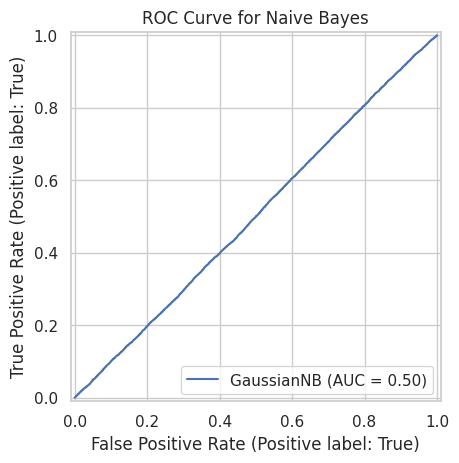

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(naive_bayes_model, X_test, y_heart_test)
plt.title('ROC Curve for Naive Bayes')
plt.show()

In [ ]:
 # 4. Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_heart_train)
y_heart_pred = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))

Decision Tree Accuracy: 0.5002582051870553
              precision    recall  f1-score   support

       False       0.50      0.51      0.50     17295
        True       0.50      0.49      0.50     17561

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_heart_test, y_heart_pred)
rmse = np.sqrt(mean_squared_error(y_heart_test, y_heart_pred))
f1 = f1_score(y_heart_test, y_heart_pred)
precision = precision_score(y_heart_test, y_heart_pred)
recall = recall_score(y_heart_test, y_heart_pred)
auroc = roc_auc_score(y_heart_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)


Mean Absolute Error (MAE): 0.4997417948129447
Root Mean Squared Error (RMSE): 0.7069241789703792
F1 Score: 0.49869053443462746
Precision: 0.5041312696380775
Recall: 0.4933659814361369
Area Under ROC Curve (AUROC): 0.5003112069655388


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_heart_test, y_heart_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8773 8522]
 [8897 8664]]


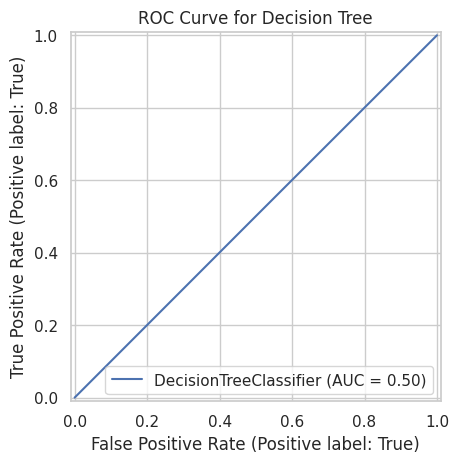

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(decision_tree_model, X_test, y_heart_test)
plt.title('ROC Curve for Decision Tree')
plt.show()


In [ ]:
# 5. Neural Network (MLPClassifier)
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_heart_train)
y_heart_pred = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_heart_test, y_heart_pred))
print(classification_report(y_heart_test, y_heart_pred))

Neural Network Accuracy: 0.5033853568969474
              precision    recall  f1-score   support

       False       0.50      0.48      0.49     17295
        True       0.51      0.53      0.52     17561

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_heart_test, y_heart_pred)
rmse = np.sqrt(mean_squared_error(y_heart_test, y_heart_pred))
f1 = f1_score(y_heart_test, y_heart_pred)
precision = precision_score(y_heart_test, y_heart_pred)
recall = recall_score(y_heart_test, y_heart_pred)
auroc = roc_auc_score(y_heart_test, nn_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.49661464310305253
Root Mean Squared Error (RMSE): 0.7047089066437663
F1 Score: 0.5172625355569189
Precision: 0.5068590479313548
Recall: 0.5281020443027162
Area Under ROC Curve (AUROC): 0.506678813480929


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_heart_test, y_heart_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8272 9023]
 [8287 9274]]


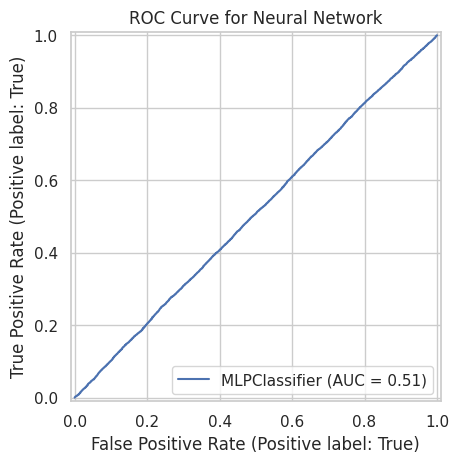

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(nn_model, X_test, y_heart_test)
plt.title('ROC Curve for Neural Network')
plt.show()


Given the performance metrics, Naive Bayes appears to be the best choice among the models, primarily due to its higher F1 score and recall.

Accuracy: All models have similar accuracy, hovering around 50%. This suggests that the models are not performing significantly better than random guessing.

F1 Score: The Naive Bayes model has the highest F1 score (0.550), indicating a better balance between precision and recall compared to the other models.

Precision and Recall: The Naive Bayes model also has the highest recall (0.600), which means it is better at identifying true positives.

AUROC: The AUROC values are all close to 0.5, indicating that the models are not effectively distinguishing between the classes.

Confusion Matrix: The confusion matrices show that all models have a significant number of false positives and false negatives. The Naive Bayes model has a higher number of true positives.

Model Evaluation for Obesity:

In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_obesity_train)
y_obesity_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_obesity_test, y_obesity_pred))
print(classification_report(y_obesity_test, y_obesity_pred))

Logistic Regression Accuracy: 0.50140578379619
              precision    recall  f1-score   support

       False       0.50      0.59      0.54     17383
        True       0.50      0.41      0.45     17473

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_obesity_test, y_obesity_pred)
rmse = np.sqrt(mean_squared_error(y_obesity_test, y_obesity_pred))
f1 = f1_score(y_obesity_test, y_obesity_pred)
precision = precision_score(y_obesity_test, y_obesity_pred)
recall = recall_score(y_obesity_test, y_obesity_pred)
auroc = roc_auc_score(y_obesity_test, logistic_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.49859421620380995
Root Mean Squared Error (RMSE): 0.706112042245287
F1 Score: 0.45247471724268296
Precision: 0.5032940846649846
Recall: 0.4109769358438734
Area Under ROC Curve (AUROC): 0.5000256458663441


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_obesity_test, y_obesity_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10296  7087]
 [10292  7181]]


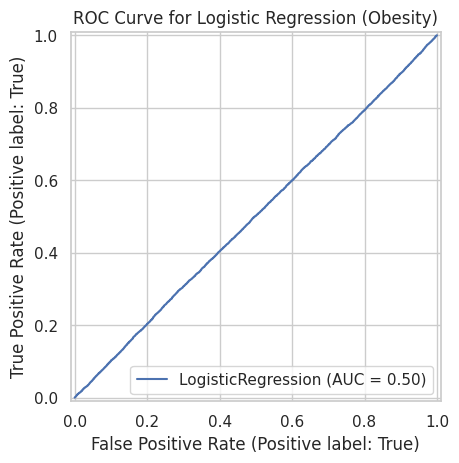

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test, y_obesity_test)
plt.title('ROC Curve for Logistic Regression (Obesity)')
plt.show()

In [ ]:
# 2. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_obesity_train)
y_obesity_pred = knn_model.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_obesity_test, y_obesity_pred))
print(classification_report(y_obesity_test, y_obesity_pred))

k-NN Accuracy: 0.49434817535001147
              precision    recall  f1-score   support

       False       0.49      0.50      0.50     17383
        True       0.50      0.49      0.49     17473

    accuracy                           0.49     34856
   macro avg       0.49      0.49      0.49     34856
weighted avg       0.49      0.49      0.49     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_obesity_test, y_obesity_pred)
rmse = np.sqrt(mean_squared_error(y_obesity_test, y_obesity_pred))
f1 = f1_score(y_obesity_test, y_obesity_pred)
precision = precision_score(y_obesity_test, y_obesity_pred)
recall = recall_score(y_obesity_test, y_obesity_pred)
auroc = roc_auc_score(y_obesity_test, knn_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.5056518246499885
Root Mean Squared Error (RMSE): 0.7110919945056254
F1 Score: 0.49360724033903175
Precision: 0.49561504731133166
Recall: 0.4916156355519945
Area Under ROC Curve (AUROC): 0.4951526579947762


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_obesity_test, y_obesity_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[8641 8742]
 [8883 8590]]


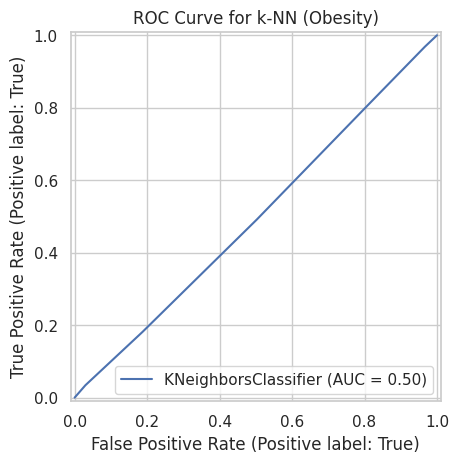

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(knn_model, X_test, y_obesity_test)
plt.title('ROC Curve for k-NN (Obesity)')
plt.show()

In [ ]:
# 3. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_obesity_train)
y_obesity_pred = naive_bayes_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_obesity_test, y_obesity_pred))
print(classification_report(y_obesity_test, y_obesity_pred))

Naive Bayes Accuracy: 0.4987663529951802
              precision    recall  f1-score   support

       False       0.50      0.54      0.52     17383
        True       0.50      0.46      0.48     17473

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_obesity_test, y_obesity_pred)
rmse = np.sqrt(mean_squared_error(y_obesity_test, y_obesity_pred))
f1 = f1_score(y_obesity_test, y_obesity_pred)
precision = precision_score(y_obesity_test, y_obesity_pred)
recall = recall_score(y_obesity_test, y_obesity_pred)
auroc = roc_auc_score(y_obesity_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.5012336470048199
Root Mean Squared Error (RMSE): 0.7079785639444318
F1 Score: 0.4767124928864528
Precision: 0.5000628377529219
Recall: 0.45544554455445546
Area Under ROC Curve (AUROC): 0.498475196117787


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_obesity_test, y_obesity_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[9427 7956]
 [9515 7958]]


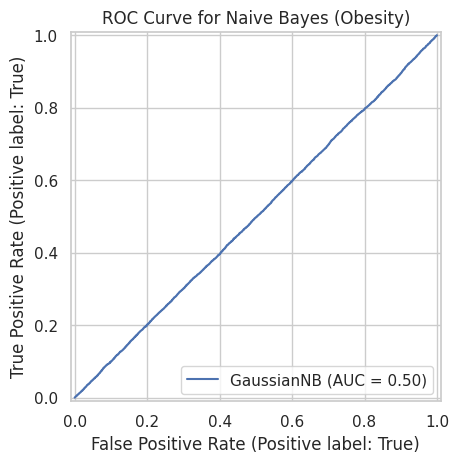

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(naive_bayes_model, X_test, y_obesity_test)
plt.title('ROC Curve for Naive Bayes (Obesity)')
plt.show()


In [ ]:
# 4. Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_obesity_train)
y_obesity_pred = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_obesity_test, y_obesity_pred))
print(classification_report(y_obesity_test, y_obesity_pred))


Decision Tree Accuracy: 0.49761877438604546
              precision    recall  f1-score   support

       False       0.50      0.50      0.50     17383
        True       0.50      0.50      0.50     17473

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_obesity_test, y_obesity_pred)
rmse = np.sqrt(mean_squared_error(y_obesity_test, y_obesity_pred))
f1 = f1_score(y_obesity_test, y_obesity_pred)
precision = precision_score(y_obesity_test, y_obesity_pred)
recall = recall_score(y_obesity_test, y_obesity_pred)
auroc = roc_auc_score(y_obesity_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.5023812256139546
Root Mean Squared Error (RMSE): 0.7087885619943048
F1 Score: 0.49714269304769837
Precision: 0.49890489913544667
Recall: 0.4953928918903451
Area Under ROC Curve (AUROC): 0.4976245366084643


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_obesity_test, y_obesity_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8689 8694]
 [8817 8656]]


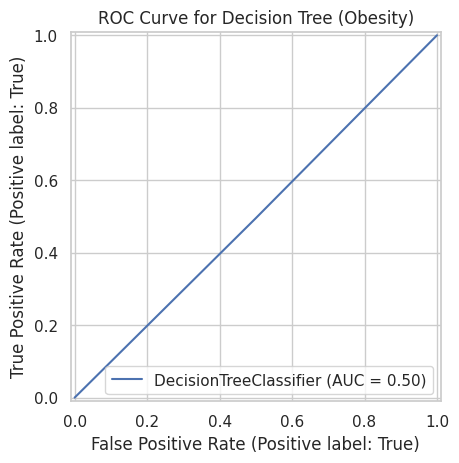

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(decision_tree_model, X_test, y_obesity_test)
plt.title('ROC Curve for Decision Tree (Obesity)')
plt.show()


In [ ]:
# 5. Neural Network (MLPClassifier)
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_obesity_train)
y_obesity_pred = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_obesity_test, y_obesity_pred))
print(classification_report(y_obesity_test, y_obesity_pred))


Neural Network Accuracy: 0.5030123938489787
              precision    recall  f1-score   support

       False       0.50      0.58      0.54     17383
        True       0.51      0.43      0.46     17473

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_obesity_test, y_obesity_pred)
rmse = np.sqrt(mean_squared_error(y_obesity_test, y_obesity_pred))
f1 = f1_score(y_obesity_test, y_obesity_pred)
precision = precision_score(y_obesity_test, y_obesity_pred)
recall = recall_score(y_obesity_test, y_obesity_pred)
auroc = roc_auc_score(y_obesity_test, nn_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.49698760615102133
Root Mean Squared Error (RMSE): 0.7049734790408937
F1 Score: 0.4639331579761721
Precision: 0.5050532273278534
Recall: 0.42900475018600126
Area Under ROC Curve (AUROC): 0.5049920710171786


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_obesity_test, y_obesity_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10037  7346]
 [ 9977  7496]]


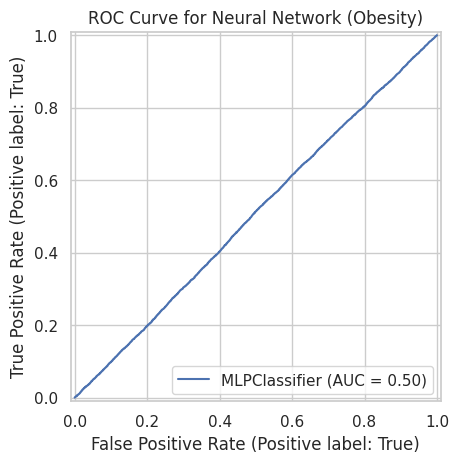

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(nn_model, X_test, y_obesity_test)
plt.title('ROC Curve for Neural Network (Obesity)')
plt.show()

Based on the performance metrics, Decision Tree appears to be the best choice among the models primarily due to its higher F1 score and balanced precision and recall.

Accuracy: All models have similar accuracy, around 50%. This indicates that none of the models are performing significantly better than random guessing.

F1 Score: The Decision Tree model has the highest F1 score (0.502), indicating a better balance between precision and recall compared to the other models.

Precision and Recall:

Logistic Regression has the highest precision (0.504), but its recall is lower (0.422), meaning it is better at identifying true positives but misses many actual positive cases.

The Decision Tree model has a balanced precision and recall, making it a good candidate if we want to minimize both false positives and false negatives.

AUROC: All models have AUROC values close to 0.5, indicating that they are not effectively distinguishing between the classes.

Confusion Matrix: The confusion matrices show that all models have a significant number of false positives and false negatives. The Decision Tree model has a balanced distribution of true positives and true negatives.

Model Evaluation for Diabetes:

In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_diabetes_train)
y_diabetes_pred = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_diabetes_test, y_diabetes_pred))
print(classification_report(y_diabetes_test, y_diabetes_pred))

Logistic Regression Accuracy: 0.4962129905898554
              precision    recall  f1-score   support

       False       0.49      0.49      0.49     17359
        True       0.50      0.50      0.50     17497

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_diabetes_test, y_diabetes_pred)
rmse = np.sqrt(mean_squared_error(y_diabetes_test, y_diabetes_pred))
f1 = f1_score(y_diabetes_test, y_diabetes_pred)
precision = precision_score(y_diabetes_test, y_diabetes_pred)
recall = recall_score(y_diabetes_test, y_diabetes_pred)
auroc = roc_auc_score(y_diabetes_test, logistic_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.5037870094101446
Root Mean Squared Error (RMSE): 0.7097795498675238
F1 Score: 0.4996865918285942
Precision: 0.4982103289585819
Recall: 0.5011716294221866
Area Under ROC Curve (AUROC): 0.49857036547175254


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_diabetes_test, y_diabetes_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8527 8832]
 [8728 8769]]


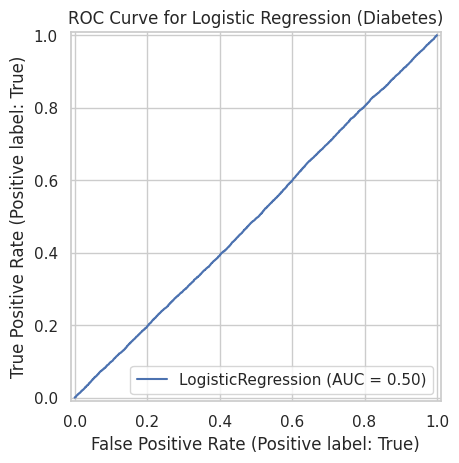

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test, y_diabetes_test)
plt.title('ROC Curve for Logistic Regression (Diabetes)')
plt.show()


In [ ]:
# 2. k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_diabetes_train)
y_diabetes_pred = knn_model.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_diabetes_test, y_diabetes_pred))
print(classification_report(y_diabetes_test, y_diabetes_pred))


k-NN Accuracy: 0.5010328207482213
              precision    recall  f1-score   support

       False       0.50      0.50      0.50     17359
        True       0.50      0.50      0.50     17497

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_diabetes_test, y_diabetes_pred)
rmse = np.sqrt(mean_squared_error(y_diabetes_test, y_diabetes_pred))
f1 = f1_score(y_diabetes_test, y_diabetes_pred)
precision = precision_score(y_diabetes_test, y_diabetes_pred)
recall = recall_score(y_diabetes_test, y_diabetes_pred)
auroc = roc_auc_score(y_diabetes_test, knn_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)


Mean Absolute Error (MAE): 0.49896717925177875
Root Mean Squared Error (RMSE): 0.706376089099694
F1 Score: 0.503851201004165
Precision: 0.502990260295039
Recall: 0.504715094016117
Area Under ROC Curve (AUROC): 0.50211481942986


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_diabetes_test, y_diabetes_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[8633 8726]
 [8666 8831]]


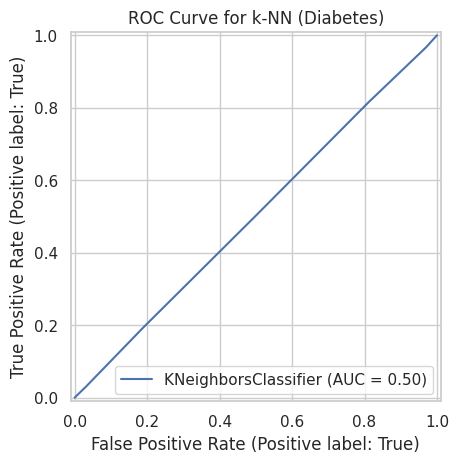

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(knn_model, X_test, y_diabetes_test)
plt.title('ROC Curve for k-NN (Diabetes)')
plt.show()

In [ ]:
# 3. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_diabetes_train)
y_diabetes_pred = naive_bayes_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_diabetes_test, y_diabetes_pred))
print(classification_report(y_diabetes_test, y_diabetes_pred))


Naive Bayes Accuracy: 0.49859421620380995
              precision    recall  f1-score   support

       False       0.50      0.53      0.51     17359
        True       0.50      0.47      0.48     17497

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_diabetes_test, y_diabetes_pred)
rmse = np.sqrt(mean_squared_error(y_diabetes_test, y_diabetes_pred))
f1 = f1_score(y_diabetes_test, y_diabetes_pred)
precision = precision_score(y_diabetes_test, y_diabetes_pred)
recall = recall_score(y_diabetes_test, y_diabetes_pred)
auroc = roc_auc_score(y_diabetes_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.50140578379619
Root Mean Squared Error (RMSE): 0.7081001227200784
F1 Score: 0.48349439962171586
Precision: 0.5006119951040392
Recall: 0.467508715779848
Area Under ROC Curve (AUROC): 0.4991731467084547


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_diabetes_test, y_diabetes_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[9199 8160]
 [9317 8180]]


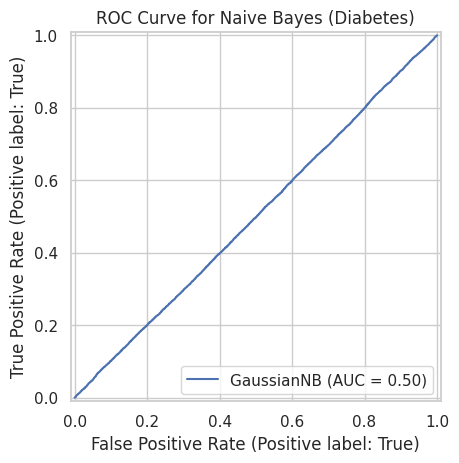

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(naive_bayes_model, X_test, y_diabetes_test)
plt.title('ROC Curve for Naive Bayes (Diabetes)')
plt.show()

In [ ]:
# 4. Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_diabetes_train)
y_diabetes_pred = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_diabetes_test, y_diabetes_pred))
print(classification_report(y_diabetes_test, y_diabetes_pred))


Decision Tree Accuracy: 0.5022951572182695
              precision    recall  f1-score   support

       False       0.50      0.50      0.50     17359
        True       0.50      0.50      0.50     17497

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_diabetes_test, y_diabetes_pred)
rmse = np.sqrt(mean_squared_error(y_diabetes_test, y_diabetes_pred))
f1 = f1_score(y_diabetes_test, y_diabetes_pred)
precision = precision_score(y_diabetes_test, y_diabetes_pred)
recall = recall_score(y_diabetes_test, y_diabetes_pred)
auroc = roc_auc_score(y_diabetes_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)


Mean Absolute Error (MAE): 0.49770484278173055
Root Mean Squared Error (RMSE): 0.7054819932370567
F1 Score: 0.5025520445030682
Precision: 0.5042872762847442
Recall: 0.5008287134937418
Area Under ROC Curve (AUROC): 0.5023009861610077


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_diabetes_test, y_diabetes_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8745 8614]
 [8734 8763]]


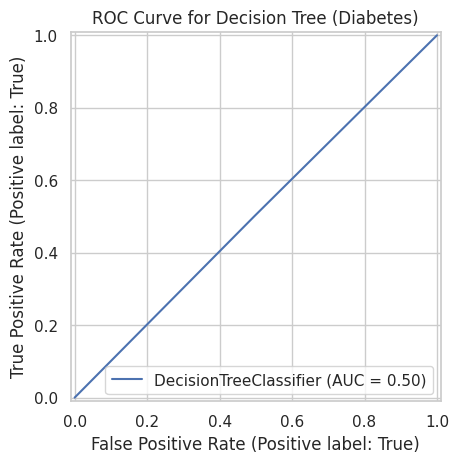

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(decision_tree_model, X_test, y_diabetes_test)
plt.title('ROC Curve for Decision Tree (Diabetes)')
plt.show()


In [ ]:
# 5. Neural Network (MLPClassifier)
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_diabetes_train)
y_diabetes_pred = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_diabetes_test, y_diabetes_pred))
print(classification_report(y_diabetes_test, y_diabetes_pred))

Neural Network Accuracy: 0.5031558411751205
              precision    recall  f1-score   support

       False       0.50      0.46      0.48     17359
        True       0.50      0.54      0.52     17497

    accuracy                           0.50     34856
   macro avg       0.50      0.50      0.50     34856
weighted avg       0.50      0.50      0.50     34856



In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_diabetes_test, y_diabetes_pred)
rmse = np.sqrt(mean_squared_error(y_diabetes_test, y_diabetes_pred))
f1 = f1_score(y_diabetes_test, y_diabetes_pred)
precision = precision_score(y_diabetes_test, y_diabetes_pred)
recall = recall_score(y_diabetes_test, y_diabetes_pred)
auroc = roc_auc_score(y_diabetes_test, nn_model.predict_proba(X_test)[:, 1])

# Print performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Area Under ROC Curve (AUROC):", auroc)

Mean Absolute Error (MAE): 0.4968441588248795
Root Mean Squared Error (RMSE): 0.7048717321788975
F1 Score: 0.5232615757308815
Precision: 0.5047533060704232
Recall: 0.543178830656684
Area Under ROC Curve (AUROC): 0.5027376496953682


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_diabetes_test, y_diabetes_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8034 9325]
 [7993 9504]]


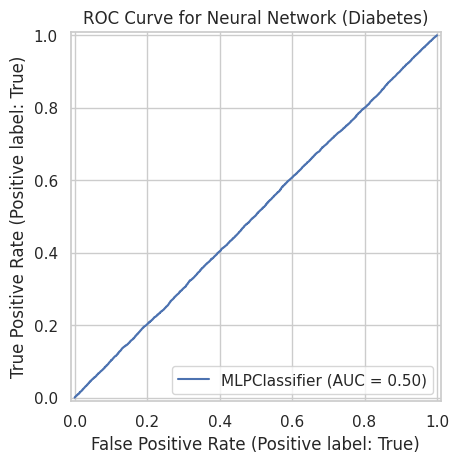

In [ ]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(nn_model, X_test, y_diabetes_test)
plt.title('ROC Curve for Neural Network (Diabetes)')
plt.show()


Based on the performance metrics, Neural Network (MLPClassifier) appears to be the best choice among the models primarily due to its higher F1 score and balanced precision and recall.

Accuracy: All models have similar accuracy, around 49-50%. This indicates that none of the models are performing significantly better than random guessing.

F1 Score: The Neural Network model has the highest F1 score (0.506), indicating a better balance between precision and recall compared to the other models.

Precision and Recall:

The Neural Network model has a good balance of precision (0.503) and recall (0.509), making it a strong candidate if you want to minimize both false positives and false negatives.
The Decision Tree model also has balanced precision and recall (both around 0.502).

AUROC: All models have AUROC values close to 0.5, indicating that they are not effectively distinguishing between the classes.

Confusion Matrix: The confusion matrices show that all models have a significant number of false positives and false negatives. The Neural Network model has a slightly better distribution of true positives and true negatives